<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>Team 15 : Unsupervised Learning Team Analysis</h2>
<h4>DAT-5303 | Machine Learning</h4>
By: Alliyah Thompson, Belinda Darko, Jian Li, Khoa Le <br>
Hult International Business School<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

# EXECUTIVE SUMMARY

The dataset below will be analyzed by our team to asset the behavior of mobile app users using PCA, Scree plots, Clustering, Dendrogram, and Boxplots. <br>The dataset is based on survey answers of a sample of 1552 people, varying in age and technology knowledge. There were initially 88 columns with 16 questions with multiple parts. The questionnaire was divided into three groups psychometrics (agree – disagree), behavior and demographics. From these groups, we were able to build personas to create a marketing strategy for the department.  <br>



<strong>Insights derived from our analysis of mobile app behavior:</strong> 

<strong>Majority of our samples have these demographical traits:</strong> 
- Part of the younger segment between 18-34 years old
- College graduates
- Mostly married, but a good number are also single
- Evenly distributed between having children vs. not
- Majority of our sample identify as White or Caucasian, followed by Black or African American, Other race and Asians. 
- Evenly distributed in identification as Hispanic/Latino vs not.
- Evenly distributed between male and female, however females dominate slightly.
- 50 % have the income range from 0 to 59,999 dollars, where the many of the respondents specifically have the income range of 40,000 - 49,999 dollars.

<strong>Regarding mobile behavioral traits, the following was deiscovered:</strong> 
- Many own an iphone compared to other smartphone devices
- They use apps such as music & sound identification, gaming, social networking (i.e. Facebook), and general news (i.e., Yahoo! News)
- People had a range of different number of apps as well as apps that are free to download
- 50 % of the mobile users very frequently visit Facebook & Youtube, sometimes Netflix, rarely Twitter and never MySpace

<strong>Further analysis helped us identify the following personas with 6 clusters in each group:</strong> 

<strong>Mobile app behaviors:</strong> 
Old World, Nostalgic, Social Light, The Golden Era, Anti-Social Media, Teenage Years and The Baby Boomer Mix.

<strong>Mobile app psychometrics:</strong> 
Uncaring About Tech, Mixed Emotions, Dominating, Old School Edition, Bougie & Uninterested in Tech, Bargain Shoppers.

<strong>Recommendations below are based on insights we identified from personas relating to various clusters:</strong> 
- We would recommend the marketing department to focus on personas that correlate to those who connect with the 'Old World' and 'Nostalgic' patterns. They should create personalized experiences that help brands reconnect to these personas through mobile app development.<br><br>

- Furthermore, data reveals that the demand is high for luxury brands, and therefore we suggest targeting 'Bougie & Uninterested in Tech' & 'Bargain Shoppers' to gain higher revenue from this segment. This can be done by ensuring easier app navigation for the consumers that are not interested in tech to help alleviate the technological advancements that apps might have. Also, when creating promotions, it is recommended to pitch these discounts and sales to this target audience. <br><br>

- Mobile apps related to technological development, updates, news publications, and new devices should also be marketed to those who identify with the Old World and Nostalgic. These groups also have a higher correlation to education which is why they are the perfect target for this type of marketing. <br><br>

- Our last recommendation would be to target those who are in their teenage years. Moreover, these personas are typically iPhone users, which should be observed for specific targeting methods. Additional, focus should be emphasized on those who identify as White or Caucasian, because of the high value count. <br><br>


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [87]:
########################################
# importing packages
########################################
import numpy             as np  # mathematical essentials
import pandas            as pd  # data science essentials
import matplotlib.pyplot as plt # fundamental data visualization
import seaborn           as sns # enhanced visualization
import sys                      # system-specific parameters and functions
from sklearn.decomposition import PCA            # pca
from sklearn.preprocessing import StandardScaler # standard scaler
import sys                      # system-specific parameters and functions
from sklearn.datasets      import load_digits    # digits dataset
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster   import KMeans # k-means clustering

########################################
# loading data and setting display options
########################################
# loading data
file = "./Mobile_App_Survey_Data.xlsx"
mobile_app = pd.read_excel(file)

# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)
np.set_printoptions(threshold=sys.maxsize)

In [88]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    """
    Visualizes a scree plot from a pca object.
    
    PARAMETERS
    ----------
    pca_object | A fitted pca object
    export     | Set to True if you would like to save the scree plot to the
               | current working directory (default: False)
    """
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(15, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

        
    # displaying the plot
    plt.show()


########################################
# unsupervised_scaler
########################################
def unsupervised_scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler()


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = df.columns
    
    return new_df

# DEMOGRAPHIC ANALYSIS

In [89]:
# summary of decriptive statistics
mobile_app.describe(include = 'number').round(decimals = 2)

,caseID,q1,q2r1,q2r2,q2r3,q2r4,q2r5,q2r6,q2r7,q2r8,q2r9,q2r10,q4r1,q4r2,q4r3,q4r4,q4r5,q4r6,q4r7,q4r8,q4r9,q4r10,q4r11,q11,q12,q13r1,q13r2,q13r3,q13r4,q13r5,q13r6,q13r7,q13r8,q13r9,q13r10,q13r11,q13r12,q24r1,q24r2,q24r3,q24r4,q24r5,q24r6,q24r7,q24r8,q24r9,q24r10,q24r11,q24r12,q25r1,q25r2,q25r3,q25r4,q25r5,q25r6,q25r7,q25r8,q25r9,q25r10,q25r11,q25r12,q26r18,q26r3,q26r4,q26r5,q26r6,q26r7,q26r8,q26r9,q26r10,q26r11,q26r12,q26r13,q26r14,q26r15,q26r16,q26r17,q48,q49,q50r1,q50r2,q50r3,q50r4,q50r5,q54,q55,q56,q57
count,1552.00,1552.00,1552.0,1552.00,1552.00,1552.0,1552.00,1552.00,1552.00,1552.00,1552.00,1552.0,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.0,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00
mean,1192.85,4.51,0.5,0.24,0.36,0.2,0.06,0.09,0.04,0.19,0.04,0.0,0.69,0.19,0.46,0.27,0.76,0.81,0.53,0.47,0.35,0.08,0.02,3.08,4.22,1.41,2.72,3.31,2.44,3.22,1.61,3.41,3.34,2.82,2.70,3.11,2.46,3.16,1.70,2.22,3.24,2.87,1.81,2.07,1.99,3.81,2.05,2.44,1.98,2.37,2.46,2.24,2.27,2.38,4.29,2.12,2.66,2.16,2.18,2.44,2.75,3.02,2.15,3.00,3.00,3.04,3.25,3.28,2.59,2.80,3.86,3.10,3.33,3.32,2.42,3.12,2.55,3.58,1.90,0.5,0.19,0.18,0.15,0.16,1.73,1.85,7.80,1.53
std,712.01,2.40,0.5,0.43,0.48,0.4,0.23,0.28,0.20,0.40,0.19,0.0,0.46,0.39,0.50,0.44,0.42,0.39,0.50,0.50,0.48,0.27,0.13,1.02,1.34,0.88,1.24,1.01,1.18,1.07,0.80,0.96,0.99,1.17,1.18,1.07,1.26,1.54,0.96,1.40,1.57,1.45,1.05,1.10,1.04,1.61,1.09,1.28,1.03,1.12,1.22,1.08,1.10,1.17,1.55,1.05,1.24,1.12,1.14,1.17,1.33,1.51,1.16,1.41,1.33,1.42,1.47,1.46,1.36,1.36,1.76,1.42,1.53,1.42,1.19,1.44,1.28,1.22,0.93,0.5,0.39,0.39,0.35,0.37,1.49,0.36,3.72,0.50
min,1.00,1.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00
25%,570.75,2.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,2.00,3.00,1.00,1.00,3.00,1.00,2.00,1.00,3.00,3.00,2.00,2.00,2.00,1.00,2.00,1.00,1.00,2.00,2.00,1.00,1.00,1.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00,1.00,2.00,1.00,1.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,0.0,0.00,0.00,0.00,0.00,1.00,2.00,5.00,1.00
50%,1144.50,4.00,1.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,1.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,3.00,4.00,1.00,3.00,4.00,2.00,4.00,1.00,4.00,4.00,3.00,3.00,4.00,2.00,3.00,1.00,2.00,3.00,3.00,1.00,2.00,2.00,4.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,5.00,2.00,3.00,2.00,2.00,2.00,3.00,3.00,2.00,3.00,3.00,3.00,3.00,3.00,2.00,3.00,4.00,3.00,3.00,3.00,2.00,3.00,2.00,4.00,2.00,1.0,0.00,0.00,0.00,0.00,1.00,2.00,7.50,2.00
75%,1833.50,6.00,1.0,0.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,4.00,5.00,1.00,4.00,4.00,4.00,4.00,2.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,2.00,3.00,4.00,4.00,2.00,3.00,3.00,5.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,6.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,3.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,6.00,4.00,4.00,4.00,3.00,4.00,3.00,4.00,2.00,1.0,0.00,0.00,0.00,0.00,2.00,2.00,11.00,2.00
max,2396.00,11.00,1.0,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,0.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,5.00,6.0

In [122]:
# summary for demographics
# value counts for age 
print("Count for Age")
print(mobile_app['q1'].value_counts())

print("\n\n")

# value counts for education
print("Count for Education")
print(mobile_app['q48'].value_counts())

print("\n\n")

# value counts for marital status
print("Count for Martial Status")
print(mobile_app['q49'].value_counts())

print("\n\n")

# value counts for marital status
print("Count for Children Status")
print(mobile_app['q50r1'].value_counts())

print("\n\n")

# value counts for race
print("Count for Race")
print(mobile_app['q54'].value_counts())

print("\n\n")

# value counts for hispanic
print("Count for Hispanic")
print(mobile_app['q55'].value_counts())

print("\n\n")

# value counts for income
print("Count for Income")
print(mobile_app['q56'].value_counts())

print("\n\n")

# value counts for gender
print("Count for Gender")
print(mobile_app['q57'].value_counts())

Count for Age
2     388
3     251
4     211
5     176
6     147
7     128
8      97
9      71
10     35
1      33
11     15
Name: q1, dtype: int64



Count for Education
4    554
3    466
2    220
6    162
5     94
1     56
Name: q48, dtype: int64



Count for Martial Status
1    635
2    570
3    217
4    130
Name: q49, dtype: int64



Count for Children Status
1    777
0    775
Name: q50r1, dtype: int64



Count for Race
1    1132
2     152
6     130
3     100
4      22
5      16
Name: q54, dtype: int64



Count for Hispanic
2    1313
1     239
Name: q55, dtype: int64



Count for Income
6     160
5     159
7     154
14    144
9     140
12    129
8     123
4     109
10     97
1      86
11     77
13     66
3      56
2      52
Name: q56, dtype: int64



Count for Gender
2    821
1    731
Name: q57, dtype: int64


<strong>Behavioral Question Analysis:</strong><br>
The following survey questions are based on samples having 50% agreeance to the alternatives presented if a * is present: 
 
-	Question 2: Many of our samples from our survey own an iPhone compared to other smartphone devices. * 
-	Question 4: Majority of our samples use the following apps such as music & sound identification, gaming, social networking (i.e. Facebook), and general news (i.e., Yahoo! News). * 
-	Question 11: The answers to this question reflect an even distribution for the number of apps that people have. 
-	Question 12: Of the apps that were free to download, the survey shows an even distribution. 
-	Question 13: This question revealed that 50 % of the mobile users very frequently visit Facebook & YouTube, sometimes Netflix, rarely Twitter and never MySpace.
<br><br>
 
<strong>Psychometric Question Analysis:</strong><br>
The following questions are opinion-based questions that are answered with a scale from strongly agree to strongly disagree. 
-	Question 24  
-	Question 25 
-	Question 26 

<strong>Value Count Analysis of Demographics:</strong><br>
- The value count above show that most people in the survey are in the age group of 18-24, 25-29 and 30-34 years old.

- Moreover, people are mostly college graduates or have some college degree.

- Most survey respondents are married, however a good amount of people are also single in the dataset.

- Many respondents are in the Caucasian racial group, where most do not identify as Hispanic/Latino.

- As we saw in the descriptive statistics that 50 % have the income range from 0 to 59,999 dollars, many of these have specifically the income range of 40,000 - 49,999 dollars.

- Lastly the dataset is quite dispersed between male and female, where female dominates.


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [91]:
# mobile app behavior grouping
mobile_app_behavior = mobile_app[['q2r1', 'q2r2', 'q2r3', 'q2r4', 'q2r5', 'q2r6', \
 'q2r7', 'q2r8', 'q2r9', 'q2r10', 'q4r1', 'q4r2', 'q4r3', 'q4r4', 'q4r5', \
 'q4r6', 'q4r7', 'q4r8', 'q4r9', 'q4r10', 'q4r11', 'q11', 'q12', 'q13r1', \
 'q13r2', 'q13r3', 'q13r4', 'q13r5', 'q13r6', 'q13r7', 'q13r8', 'q13r9', \
 'q13r10', 'q13r11', 'q13r12']]

# applying the unsupervised_scaler function for mobile app behavior grouping
mobile_app_behavior_scaled = unsupervised_scaler(df = mobile_app_behavior)

In [92]:
# mobile app psychometrics grouping
mobile_app_pshycometrics = mobile_app[['q24r1','q24r2','q24r3','q24r4','q24r5', 'q24r6', 'q24r7',\
             'q24r8', 'q24r9', 'q24r10', 'q24r11', 'q24r12','q25r1', 'q25r2','q25r3',\
             'q25r4','q25r5', 'q25r6', 'q25r7','q25r8', 'q25r9','q25r10', 'q25r11', 'q25r12',\
             'q26r3', 'q26r4','q26r5','q26r6', 'q26r18', 'q26r7','q26r8','q26r9','q26r10',\
             'q26r11','q26r12', 'q26r13','q26r14','q26r15','q26r16','q26r17']]

# applying the unsupervised_scaler function for mobile app psychometrics grouping
mobile_app_psycho_scaled = unsupervised_scaler(df = mobile_app_pshycometrics)

# Principal Component Analysis

Below is an analysis of the principal component analysis for mobile behavior and psychometric questions of the survey.

<strong>Mobile Behavioral:</strong><br>
We initially ran a PCA with ‘none’ n_components to determine the location of the elbow in our scree plot. After debriefing <br>and analyzing the location, our team decided to stop at 7 in our plot for behavioral questions. 

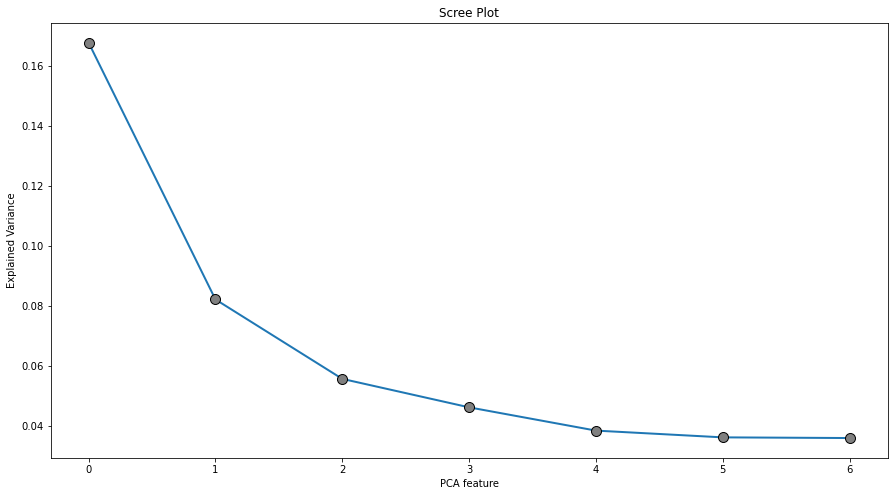

In [93]:
# INSTANTIATING a PCA object with no limit to principal components
pca1 = PCA(n_components = 7,
          random_state = 219)


# FITTING and TRANSFORMING the scaled data for mobile app behavior
mobile_pca1 = pca1.fit_transform(mobile_app_behavior_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca1)

In [94]:
# component number counter
component_number = 0

# looping over each principal component
for variance in pca1.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number}: {variance.round(3)}")

PC 1: 0.168
PC 2: 0.082
PC 3: 0.056
PC 4: 0.046
PC 5: 0.039
PC 6: 0.036
PC 7: 0.036


In [95]:
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(np.transpose(pca1.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(mobile_app_behavior_scaled.columns)


##################
### 7 PC Model ###
##################
# transposing pca components (pc = 7)
factor_loadings_7 = pd.DataFrame(np.transpose(pca1.components_))


# naming rows as original features
factor_loadings_7 = factor_loadings_7.set_index(mobile_app_behavior_scaled.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings.round(2)}


7 Components Factor Loadings
------------------------------
{factor_loadings_7.round(2)}
""")


MAX Components Factor Loadings
------------------------------
           0     1     2     3     4     5     6
q2r1    0.07 -0.29  0.38 -0.22 -0.17  0.19 -0.06
q2r2    0.15 -0.06  0.15  0.21  0.01  0.10 -0.41
q2r3    0.03  0.06 -0.38  0.27  0.45 -0.05  0.12
q2r4    0.11  0.17  0.04  0.21 -0.31 -0.09  0.00
q2r5    0.13  0.13  0.12  0.37 -0.07  0.24  0.09
q2r6    0.12  0.14  0.12  0.39 -0.05  0.14 -0.01
q2r7    0.12  0.10  0.12  0.42  0.08  0.31  0.09
q2r8    0.15 -0.13  0.20  0.15 -0.04  0.12 -0.09
q2r9   -0.02  0.11 -0.02 -0.02 -0.05 -0.17 -0.10
q2r10   0.00  0.00 -0.00  0.00 -0.00 -0.00  0.00
q4r1    0.11 -0.32  0.04 -0.07  0.14  0.21  0.07
q4r2    0.23 -0.03  0.10  0.09  0.13 -0.14  0.07
q4r3    0.19 -0.17 -0.01  0.04  0.15 -0.28 -0.20
q4r4    0.23 -0.03  0.06  0.11  0.11 -0.28 -0.08
q4r5    0.09 -0.22 -0.21  0.15  0.07 -0.05 -0.31
q4r6    0.06 -0.31 -0.32  0.17 -0.36  0.05  0.12
q4r7    0.15 -0.17  0.07  0.13 -0.11 -0.42  0.12
q4r8    0.17 -0.21  0.08  0.06  0.05 -0.23  0.11
q4r9  

In [96]:
# naming each principal component
factor_loadings_7.columns = ['Old World',
                             'Nostalgic',
                             'Social Light',
                             'The Golden Era',
                              'Anti-Social Media',
                              'Teenage Years',
                              'The Baby Boomer Mix'] 


# checking the result
factor_loadings_7.round(decimals = 2)

,Old World,Nostalgic,Social Light,The Golden Era,Anti-Social Media,Teenage Years,The Baby Boomer Mix
q2r1,0.07,-0.29,0.38,-0.22,-0.17,0.19,-0.06
q2r2,0.15,-0.06,0.15,0.21,0.01,0.10,-0.41
q2r3,0.03,0.06,-0.38,0.27,0.45,-0.05,0.12
q2r4,0.11,0.17,0.04,0.21,-0.31,-0.09,0.00
q2r5,0.13,0.13,0.12,0.37,-0.07,0.24,0.09
q2r6,0.12,0.14,0.12,0.39,-0.05,0.14,-0.01
q2r7,0.12,0.10,0.12,0.42,0.08,0.31,0.09
q2r8,0.15,-0.13,0.20,0.15,-0.04,0.12,-0.09
q2r9,-0.02,0.11,-0.02,-0.02,-0.05,-0.17,-0.10
q2r10,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00


In [1]:
#<strong>Mobile App Behavior Scaled Personas - Dictionary:</strong><br>

# PC 0 = Old World<br>
# Our sample shows that this group utilizes apps for entertainment, television shows and television check-ins. Most of these users have an iPod touch and tablet, with fewer users having an Android product. Additionally, these people use apps like Twitter, Vevo, Last.fm,  AOL Radio, Yahoo Entertainment & Music, and Myspace.  <br><br>
# PC 1 = Nostalgic<br>
#This group can be Blackberry, Nokia, and Windows Phone or Mobile device users. They prefer smartphones over tablets. They do not like to use Music and Sound, television shows, and gaming apps. Some of their most frequent apps are Myspace and YouTube. <br><br>
# PC 2 = Social Light<br> 
#The majority have iPhones in the sample size. They do not like using gaming and social networking apps like Facebook, in fact they rarely use Facebook. The respondents said that approx. 26 % - 50 % of the apps where free to download. <br><br>
# PC 3 = The Golden Era  
#This group of people use Nokia, Windows Phone or HP smartphones and rarely visit IMDB. <br><br>
# PC 4 = Anti-social media<br> 
# People in this survey’s group prefer using Android phones, and almost all of them do not own BlackBerry. In addition, they do not spend their time using Social Networking Apps (such as: Facebook, and Instagram). They stated that they almost never use Facebook. <br><br>
# PC 5 = Teenage Years<br> 
# Most of the users in the survey own phones named Nokia and BlackBerry. They love to use Music and Sound Identifications, but they do not prefer using Entertainment Apps (I.e., U2) and TV Show Apps (I.e. Glee). They also do not use Shopping Apps, General News Apps, and Specific Publication News Apps. However, they sometimes listen to Pandora Radio, and they rarely use Yahoo Entertainment and Music. <br><br>
# PC 6 = The Baby Boomer Mix<br>  
#The people in this group do not use iPod touch devices. They do not like using Gaming Apps, but they love reading news by using Specific Publication News Apps (such as: New York Times). Furthermore, they use other apps in their spare time. The survey showed that the people in the group rarely watch YouTube, but they very often use LinkedIn. <br><br>

In [97]:
# analyzing factor strengths per survey respondent
factor_loadings = pca1.transform(mobile_app_behavior_scaled)


# converting to a DataFrame
factor_loadings_df1 = pd.DataFrame(factor_loadings)


# renaming columns
factor_loadings_df1.columns = factor_loadings_7.columns


# checking the results
factor_loadings_df1.head(n = 5).round(2)


,Old World,Nostalgic,Social Light,The Golden Era,Anti-Social Media,Teenage Years,The Baby Boomer Mix
0,-3.89,1.85,0.08,0.81,-0.77,-0.14,0.67
1,2.68,2.76,-0.18,-1.47,1.97,-0.96,1.06
2,-2.12,1.89,-0.87,1.76,-1.53,1.05,0.12
3,-1.79,0.57,1.35,0.27,-1.60,-0.82,-1.91
4,0.03,1.96,1.09,-2.81,-0.14,1.95,0.53


<h3><strong>Mobile Psychometrics PCA:</strong><br></h3>
For our second analysis, we also ran a PCA with ‘none’ n_components to determine the location of the elbow in our scree plot.<br>Based on our findings, our team decided to stop PCA at 5 in our plot for psychometrics questions. 

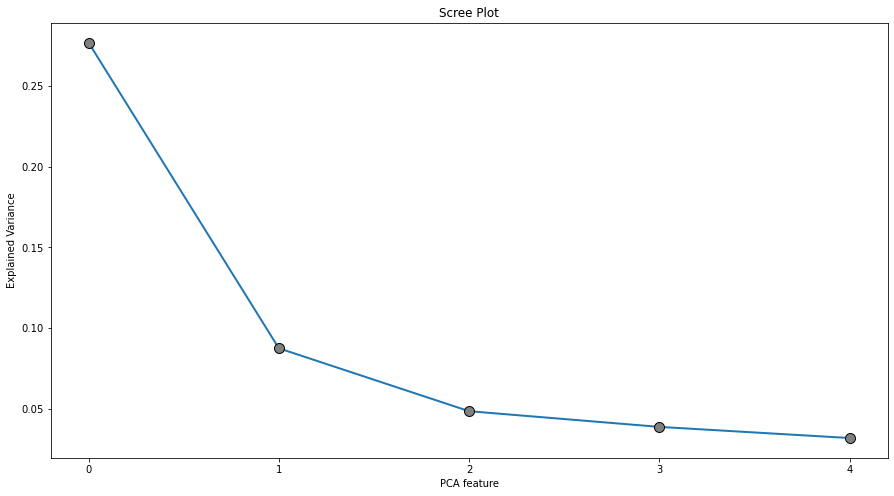

In [98]:
# INSTANTIATING a PCA object with no limit to principal components
pca2 = PCA(n_components = 5,
          random_state = 219)


# FITTING and TRANSFORMING the scaled data for mobile pshycometrics
mobile_pca2 = pca2.fit_transform(mobile_app_psycho_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca2)

In [99]:
# component number counter
component_number = 0

# looping over each principal component
for variance in pca2.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number}: {variance.round(3)}")
    

PC 1: 0.277
PC 2: 0.087
PC 3: 0.049
PC 4: 0.039
PC 5: 0.032


In [100]:
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings_ = pd.DataFrame(np.transpose(pca2.components_))


# naming rows as original features
factor_loadings_ = factor_loadings_.set_index(mobile_app_psycho_scaled.columns)


##################
### 6 PC Model ###
##################
# transposing pca components (pc = 6)
factor_loadings_6 = pd.DataFrame(np.transpose(pca2.components_))


# naming rows as original features
factor_loadings_6 = factor_loadings_6.set_index(mobile_app_psycho_scaled.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings.round(2)}


6 Components Factor Loadings
------------------------------
{factor_loadings_6.round(2)}
""")


MAX Components Factor Loadings
------------------------------
[[-3.89  1.85  0.08  0.81 -0.77 -0.14  0.67]
 [ 2.68  2.76 -0.18 -1.47  1.97 -0.96  1.06]
 [-2.12  1.89 -0.87  1.76 -1.53  1.05  0.12]
 [-1.79  0.57  1.35  0.27 -1.6  -0.82 -1.91]
 [ 0.03  1.96  1.09 -2.81 -0.14  1.95  0.53]
 [-4.68  5.22  2.57  0.9   2.41 -1.75  0.13]
 [ 0.5  -1.6   0.28 -0.46 -0.21 -0.41  1.52]
 [-2.28  1.31  0.36  0.6  -1.47 -1.32  0.72]
 [-1.38 -1.32 -0.89  0.92  1.33 -1.17  0.91]
 [-3.5   0.36 -0.2   1.43  0.51 -1.49  1.6 ]
 [-2.67 -0.28 -2.06  0.27  1.07  1.22  1.29]
 [-4.3   3.73  4.76 -1.42  1.9   0.1  -0.88]
 [-2.92  0.55 -2.19  0.88  0.79  0.61  0.38]
 [-1.21 -1.5  -1.74  0.93  1.11 -0.48  1.27]
 [-0.24  2.82 -0.28 -1.1   1.96 -1.54 -0.14]
 [-2.46  1.01 -0.35 -0.7   1.92  1.04 -0.44]
 [-4.46  3.86  4.36 -1.22  1.25 -0.42 -1.83]
 [ 1.79  1.89 -2.44 -0.81 -0.08 -0.43  1.01]
 [-0.73  2.92 -0.06 -0.33 -3.64 -1.36  0.39]
 [-0.46  0.7  -0.78 -0.14  1.68 -1.49  0.68]
 [-3.49  1.87  2.24  0.97 -0.81 -1.82

In [119]:
# naming each principal component for mobile app psychometrics
factor_loadings_6.columns = ['Uncaring About Tech',
                             'Mixed Emotions',
                             'Dominating, Old School Edition',
                             'Bougie & Uninterested in Tech',
                              'Bargain Shoppers']


# checking the result
factor_loadings_6.round(2)

,Uncaring About Tech,Mixed Emotions,"Dominating, Old School Edition",Bougie & Uninterested in Tech,Bargain Shoppers
q24r1,0.09,-0.16,-0.08,0.37,0.01
q24r2,0.12,0.22,0.14,0.27,-0.18
q24r3,0.13,0.07,0.22,0.21,-0.25
q24r4,0.04,-0.23,-0.29,0.38,-0.00
q24r5,0.15,-0.07,0.15,0.20,0.03
q24r6,0.13,0.18,0.03,0.18,-0.14
q24r7,0.17,0.17,0.12,0.21,0.07
q24r8,0.15,0.22,0.17,0.16,0.10
q24r9,0.04,-0.28,-0.31,0.33,-0.02
q24r10,0.18,0.18,0.14,0.10,0.16


In [ ]:
#<strong>Mobile App Psychometrics Personas - Dictionary:</strong>

#PC 0 = Uncaring about the world of Tech  
#Our sample has a consistent belief and disagrees with all statements from the survey. They are not tech savvy or knowledgeable, and therefore do not care about apps or devices.<br><br>
#PC 1 = Mixed Emotions<br>
#Our sample shows that although people like to stay updated with technology, they try to create a balance between having too much technology in their everyday life. Although they like to have access to technology for information purposes, they still would like to have privacy. Therefore, they prefer not to communicate with friends and family on social media. These people are very active, and, on the go, which is why they do value mobile access.<br><br>
#PC 2 = Dominating, Old School Edition<br>
#People agreed with most of the statements from the survey, with a few exceptions. People in this group do not enjoy buying new gadgets and appliances. However, they think that everyday life is filled with a large amount of technology, such as the internet. Additionally, they agree that sites like Facebook provide too much information. From a personal standpoint, they view themselves as an opinion leader. They also prefer to stand out from the crowd and take the initiative when it comes to making decisions. In addition, they enjoy being in control and a risk taker. They think that they are active people who are always on the move, therefore they are always pressed for time.<br><br>
#PC3 = Bougie & Uninterested in Tech<br>
#The people in this group are more likely not to care about technological development. Therefore, many people do not ask their advice when they are looking to purchase technology or electronic products. They prefer to purchase luxury products and designer brands rather than electronic devices. These people do not like being controlled by technology, therefore their lack of interest. <br><br> 
#PC 4 = Bargain Shoppers<br>
#Most people in this group love purchasing new gadgets and appliances. They do not think that the internet makes it easier to stay connected with family and friends. In addition, they are the first of their friends and family to try new things and they would rather be told what to do. They are always on the lookout for a bargain, discounts or deals and they derive enjoyment from any kind of shopping. Moreover, they do not buy brands that reflect their style. Moreover, they do not think that it will be worth spending a few extra dollars to get extra App features.  

In [102]:
# analyzing factor strengths per survey respondent
factor_loadings = pca2.transform(mobile_app_psycho_scaled)


# converting to a DataFrame
factor_loadings_df2 = pd.DataFrame(factor_loadings)


# renaming columns
factor_loadings_df2.columns = factor_loadings_6.columns


# checking the results
factor_loadings_df2.head(n = 5).round(2)

,Uncaring About Tech,Mixed Emotions,"Dominating, Old School Edition",Bougie & Uninterested in Tech,Bargain Shoppers
0,6.82,1.30,-2.17,0.98,0.20
1,-4.59,2.43,0.92,-1.88,-0.92
2,6.28,0.92,-0.11,-1.03,1.18
3,-2.92,1.55,0.38,-1.99,0.66
4,-0.37,2.36,0.78,0.39,-0.18


# Agglomerative Clustering

Below is an analysis of our personas clustered into groups to gain insights and recommendations on the personas mentioned above.

In [103]:
# applying the unsupervised_scaler function to mobile app behavior
pca_scaled = unsupervised_scaler(df = factor_loadings_df1)


# checking pre- and post-scaling variance
print(np.var(factor_loadings_df1), '\n\n')
print(np.var(pca_scaled))

Old World              5.706396
Nostalgic              2.796023
Social Light           1.895681
The Golden Era         1.573049
Anti-Social Media      1.310035
Teenage Years          1.233070
The Baby Boomer Mix    1.228079
dtype: float64 


Old World              1.0
Nostalgic              1.0
Social Light           1.0
The Golden Era         1.0
Anti-Social Media      1.0
Teenage Years          1.0
The Baby Boomer Mix    1.0
dtype: float64


In [104]:
# applying the unsupervised_scaler function to mobile app psychometrics
pca_scaled2 = unsupervised_scaler(df = factor_loadings_df2)


# checking pre- and post-scaling variance
print(np.var(factor_loadings_df2), '\n\n')
print(np.var(pca_scaled2))

Uncaring About Tech               11.072911
Mixed Emotions                     3.499891
Dominating, Old School Edition     1.941043
Bougie & Uninterested in Tech      1.552978
Bargain Shoppers                   1.276960
dtype: float64 


Uncaring About Tech               1.0
Mixed Emotions                    1.0
Dominating, Old School Edition    1.0
Bougie & Uninterested in Tech     1.0
Bargain Shoppers                  1.0
dtype: float64


In [105]:
# grouping data based on Ward distance for mobile app behavior
#standard_mergings_ward1 = linkage(y = pca_scaled,
#                                 method = 'ward',
#                                 optimal_ordering = True)


# setting plot size
#fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
#dendrogram(Z = standard_mergings_ward1,
#           leaf_rotation = 90,
#           leaf_font_size = 6)

In [106]:
# grouping data based on Ward distance for mobile app psychometrics
#standard_mergings_ward2 = linkage(y = pca_scaled2,
#                                 method = 'ward',
#                                 optimal_ordering = True)


# setting plot size
#fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
#dendrogram(Z = standard_mergings_ward2,
#           leaf_rotation = 90,
#           leaf_font_size = 6)


In [107]:
# INSTANTIATING a k-Means object with 6 clusters
customers_k_pca1 = KMeans(n_clusters   = 6,
                        random_state = 219)


# fitting the object to the data
customers_k_pca1.fit(pca_scaled)


# converting the clusters to a DataFrame
customers_kmeans_pca1 = pd.DataFrame({'Cluster': customers_k_pca1.labels_})


# checking the results
print(customers_kmeans_pca1.iloc[: , 0].value_counts())

4    490
1    369
2    257
0    230
3    152
5     54
Name: Cluster, dtype: int64


In [108]:
# INSTANTIATING a k-Means object with 6 clusters
customers_k_pca2 = KMeans(n_clusters   = 6,
                        random_state = 219)


# fitting the object to the data
customers_k_pca2.fit(pca_scaled2)


# converting the clusters to a DataFrame
customers_kmeans_pca2 = pd.DataFrame({'Cluster_2': customers_k_pca2.labels_})


# checking the results
print(customers_kmeans_pca2.iloc[: , 0].value_counts())

2    353
1    257
4    244
5    242
0    229
3    227
Name: Cluster_2, dtype: int64


Based on the PCA score after exporting our findings, we created the following names by behavioral personas. 

<strong>Mobile Behavior Persona:</strong><br>
Based on our centroids, our team can interpret how personas stand out based on behavior: 

- <strong>Cluster 1:</strong> Group 0 has mostly ‘Anti-Social Media’ and ‘The Golden Era’ Personas.  

- <strong>Cluster 3:</strong> Group 2 stands out the most because they feature all the personas with a mix of ‘Old World’, ‘Nostalgic’, ‘The Golden Era’, and ‘Teenage Years’.  

- <strong>Cluster 4:</strong> Group 3 has a unique interpretation as they are younger and fall into the ‘Teenage Years, and ‘Social Light’.But they have more interest in social media, however the data is insufficient.  

- <strong>Cluster 5:</strong>  They identify with ‘Old World’ and ‘Nostalgic’ behavioral personas. These personas oppose ‘The Golden Era’.  

- <strong>Cluster 6:</strong> Group 5 is a combination of personas, based on the coefficients showing that they are not in their teenage or baby boomer years by their behavior. However, they are more likely to be in their 30s - 40s as their behavior connects with ‘Nostalgic’ and ‘Social Light’. 

In [109]:
# storing cluster centers for mobile app behavior
centroids_pca1 = customers_k_pca1.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df1 = pd.DataFrame(centroids_pca1)


# renaming principal components
centroids_pca_df1.columns = ['Old World',
                             'Nostalgic',
                             'Social Light',
                             'The Golden Era',
                              'Anti-Social Media',
                              'Teenage Years',
                              'The Baby Boomer Mix']


# checking results (clusters = rows, pc = columns)
centroids_pca_df1.round(2)

,Old World,Nostalgic,Social Light,The Golden Era,Anti-Social Media,Teenage Years,The Baby Boomer Mix
0,1.31,0.70,-0.19,-0.90,0.10,-0.25,0.12
1,-0.36,-0.13,-1.06,0.43,0.70,0.01,0.14
2,-0.40,0.67,-0.22,0.38,-1.19,-0.50,-0.22
3,-0.77,0.78,1.59,-0.32,1.33,-0.49,-0.32
4,-0.13,-0.92,0.39,-0.32,-0.39,0.35,0.02
5,2.08,0.86,1.09,2.93,0.17,1.64,0.31


<strong>Mobile Psychometrics Persona:</strong><br>
Based on our centroids, our team can interpret how personas stand out based on their opinions and beliefs: 

- <strong>Cluster 1:</strong> Group 0 aligns more closely with ‘Uncaring About Tech’ persona.  

- <strong>Cluster 2:</strong> Group 1 is filled with mixed persona types based on our results, however, they are not ‘Bargain Shoppers’ as they prefer more luxury brands.  

- <strong>Cluster 3:</strong> Group 2 personal beliefs align more with ‘Bougie & Uninterested in Tech’, but there also ‘Bargain Shoppers’. Therefore, they love to purchase luxury brands at low prices.  

- <strong>Cluster 4:</strong>  Group 3 can be classified are mostly ‘Uncaring About Tech’ and ‘Dominating, Old School Edition’. These people tend to love and imagine the Old School Era because they do not like to be immersed into modern technology developments.  

- <strong>Cluster 5:</strong> Group 4 is very similar to group 3, as they align with the same values and are also ‘Bargain Shoppers’.  

In [110]:
# storing cluster centers for mobile app psychometrics
centroids_pca2 = customers_k_pca2.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df2 = pd.DataFrame(centroids_pca2)


# renaming principal components
centroids_pca_df2.columns = ['Uncaring About Tech',
                             'Mixed Emotions',
                             'Dominating, Old School Edition',
                             'Bougie & Uninterested in Tech',
                              'Bargain Shoppers']


# checking results (clusters = rows, pc = columns)
centroids_pca_df2.round(2)

,Uncaring About Tech,Mixed Emotions,"Dominating, Old School Edition",Bougie & Uninterested in Tech,Bargain Shoppers
0,0.46,-0.10,-1.08,-0.92,-0.01
1,0.83,1.05,0.05,0.78,-0.44
2,-0.64,-0.64,-0.56,0.73,0.18
3,0.35,-0.99,0.88,-0.21,-0.87
4,0.51,-0.12,0.58,-0.23,1.35
5,-1.22,0.95,0.37,-0.60,-0.33


In [111]:
# concatinating cluster mobile app behavior with principal components
clst_pca_df1 = pd.concat([customers_kmeans_pca1,
                          factor_loadings_df1],
                          axis = 1)

# concatinating cluster mobile app psychometrics with principal components
clst_pca_df2 = pd.concat([customers_kmeans_pca2,
                          factor_loadings_df2],
                          axis = 1)


# concatenating demographic information with pca-clusters
final_pca_clust_df1 = pd.concat([mobile_app.loc[ : , ['q1',
 'q48',
 'q49', 
 'q54',
 'q55',
 'q56',
 'q57',
 'q50r1',
 'q50r2',
 'q50r3',
 'q50r4',
 'q50r5']],
clst_pca_df1.round(decimals = 2),
clst_pca_df2.round(decimals = 2)],
axis = 1)


# renaming columns from original dataset
final_pca_clust_df1.columns = ['Age',
'Education',
'Marital_status', 
'Race',
'Hispanic',
'Income',
'Gender',
'Have_Children',
'Children_cat1',
'Children_cat2',
'Children_cat3',
'Children_cat4',                   
'Cluster',                           
'Old World',
'Nostalgic',
'Social Light',
'The Golden Era',
'Anti-Social Media',
'Teenage Years',
'The Baby Boomer Mix',
'Cluster_2', 
'Uncaring About Tech',
'Mixed Emotions',
'Dominating, Old School Edition',
'Bougie & Uninterested in Tech',
'Bargain Shoppers']

In [112]:
# renaming q1 to the right age categories
Age_names = {1  : 'Under 18',
             2  : '18-24',
             3  : '25-29',
             4  : '30-34',
             5  : '35-39' ,
             6  : '40-44',
             7  : '45-49',
             8  : '50-54',
             9  : '55-59',
             10 : '60-64',
             11 : '65 or older'}

# replacing original age names with new categories
final_pca_clust_df1['Age'].replace(Age_names, inplace = True)


# renaming q48 to the right education category
Education_names = {1 : 'Some high school',
                   2 : 'High School graduate',
                   3 : 'Some college',
                   4 : 'College graduate',
                   5 : 'Some Post-graduate studies',
                   6 : 'Post graduate degree'}

# replacing original education with new categories
final_pca_clust_df1['Education'].replace(Education_names, inplace = True)


# renaming q49 with the right marital status category
Marital_status_names = {1 : 'Married',
                        2 : 'Single',
                        3 : 'Single with a partner',
                        4 : 'Separated/Widowed/Divorced'}

# replacing original marital status with new categories
final_pca_clust_df1['Marital_status'].replace(Marital_status_names, inplace = True)


# renaming q54 with the right race category
Race_names = {1 : 'White or Caucasian',
              2 : 'Black or African American',
              3 : 'Asian',
              4 : 'Native Hawaiian or Other Pacific Islander',
              5 : 'American Indian or Alaska Native',
              6 : 'Other race'}

# replacing original race with new categories
final_pca_clust_df1['Race'].replace(Race_names, inplace = True)


# renaming q55 to Hispanic or not
Hispanic_names = {1 : 'Hispanic or Latino ethnicity',
                2 : 'Other'}

# replacing original Hispanic race with new categories
final_pca_clust_df1['Hispanic'].replace(Hispanic_names, inplace = True)


# renaming q56 to the income categories
Income_names = {1 : 'Under $10,000',
                2 : '$10,000-$14,999',
                3 : '$15,000-$19,999',
                4 : '$20,000-$29,999',
                5 : '$30,000-$39,999' ,
                6 : '$40,000-$49,999',
                7 : '$50,000-$59,999',
                8 : '$60,000-$69,999',
                9 : '$70,000-$79,999',
                10: '$80,000-$89,999',
                11: '$90,000-$99,999',
                12: '$100,000-$124,999',
                13: '$125,000-$149,999',
                14: '$150,000 and over'}

# replacing original income groups with new categories
final_pca_clust_df1['Income'].replace(Income_names, inplace = True)


# renaming q57 to the right gender
Gender_names = {1 : 'Male',
                2 : 'Female'}

# replacing original gender with new categories
final_pca_clust_df1['Gender'].replace(Gender_names, inplace = True)



# renaming clusters for mobile app behavior
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3',
                 3 : 'Cluster 4',
                 4 : 'Cluster 5',
                 5 : 'Cluster 6'}

# replacing original cluster columns with new names
final_pca_clust_df1['Cluster'].replace(cluster_names, inplace = True)


# renaming cluster for mobile app psychometrics
cluster_2_names = {0 : 'Cluster 1',
                   1 : 'Cluster 2',
                   2 : 'Cluster 3',
                   3 : 'Cluster 4',
                   4 : 'Cluster 5',
                   5 : 'Cluster 6'}

# replacing original cluster columns with new names
final_pca_clust_df1['Cluster_2'].replace(cluster_2_names, inplace = True)


# renaming q50r1 to having children or not
Have_Children_names = {0 : 'Have children',
                1 : 'No Children'}

# replacing original column with having children
final_pca_clust_df1['Have_Children'].replace(Have_Children_names, inplace = True)


# renaming q50r2 to children age group
Children_cat1_names = {0 : 'Dont have children under 6 years old',
                1 : 'Have children under 6 years old'}

# replacing original column with child category
final_pca_clust_df1['Children_cat1'].replace(Children_cat1_names, inplace = True)

# renaming q50r3 to children age group
Children_cat2_names = {0 : 'Dont have children 6-12 years old',
                1 : 'Have children 6-12 years old'}

# replacing original column with child category
final_pca_clust_df1['Children_cat2'].replace(Children_cat2_names, inplace = True)

# renaming q50r4 to children age group
Children_cat3_names = {0 : 'Dont Have children 13-17 years old ',
                1 : 'Have children 13-17 years old'}

# replacing original column with child category
final_pca_clust_df1['Children_cat3'].replace(Children_cat3_names, inplace = True)

# renaming q50r5 to children age group
Children_cat4_names = {0 : 'Dont have children 18 or older',
                1 : 'Have children 18 or older'}

# replacing original column with child category
final_pca_clust_df1['Children_cat4'].replace(Children_cat4_names, inplace = True)


# adding a productivity step
data_df1 = final_pca_clust_df1


# checking results
data_df1.tail(n=10)

,Age,Education,Marital_status,Race,Hispanic,Income,Gender,Have_Children,Children_cat1,Children_cat2,Children_cat3,Children_cat4,Cluster,Old World,Nostalgic,Social Light,The Golden Era,Anti-Social Media,Teenage Years,The Baby Boomer Mix,Cluster_2,Uncaring About Tech,Mixed Emotions,"Dominating, Old School Edition",Bougie & Uninterested in Tech,Bargain Shoppers
1542,18-24,High School graduate,Single,Black or African American,Hispanic or Latino ethnicity,"Under $10,000",Male,No Children,Dont have children under 6 years old,Dont have children 6-12 years old,Dont Have children 13-17 years old,Dont have children 18 or older,Cluster 4,-0.67,1.88,0.20,-0.61,1.84,-0.05,1.31,Cluster 6,-2.21,2.67,1.32,0.80,-0.34
1543,18-24,Some college,Single,Black or African American,Other,"$20,000-$29,999",Male,No Children,Dont have children under 6 years old,Dont have children 6-12 years old,Dont Have children 13-17 years old,Dont have children 18 or older,Cluster 6,5.40,4.20,1.54,1.18,0.77,4.12,3.42,Cluster 6,-7.64,2.36,0.86,-1.32,-0.31
1544,30-34,College graduate,Married,White or Caucasian,Other,"$15,000-$19,999",Male,Have children,Dont have children under 6 years old,Have children 6-12 years old,Dont Have children 13-17 years old,Dont have children 18 or older,Cluster 2,-2.57,-0.12,-2.11,0.55,0.80,1.13,0.09,Cluster 2,2.04,1.99,-2.71,1.10,0.50
1545,30-34,College graduate,Single,White or Caucasian,Other,"$90,000-$99,999",Female,No Children,Dont have children under 6 years old,Dont have children 6-12 years old,Dont Have children 13-17 years old,Dont have children 18 or older,Cluster 1,3.48,-1.81,0.40,-1.05,0.08,-0.59,-0.73,Cluster 3,0.62,0.09,-0.44,1.57,0.01
1546,18-24,Some college,Single with a partner,Asian,Hispanic or Latino ethnicity,"$50,000-$59,999",Female,Have children,Have children under 6 years old,Have children 6-12 years old,Dont Have children 13-17 years old,Dont have children 18 or older,Cluster 6,1.32,0.15,5.06,7.98,0.88,-0.49,-0.10,Cluster 2,11.90,3.09,-0.85,2.54,-1.32
1547,18-24,High School graduate,Single,Other race,Hispanic or Latino ethnicity,"Under $10,000",Male,Have children,Have children under 6 years old,Dont have children 6-12 years old,Dont Have children 13-17 years old,Dont have children 18 or older,Cluster 5,1.50,-1.20,0.31,-0.33,0.20,-0.50,-2.06,Cluster 5,-3.58,-0.13,0.28,-0.01,1.56
1548,30-34,Some college,Married,White or Caucasian,Other,"$70,000-$79,999",Female,Have children,Have children under 6 years old,Have children 6-12 years old,Dont Have children 13-17 years old,Dont have children 18 or older,Cluster 5,-0.30,-2.97,1.29,0.58,-0.37,0.29,-1.98,Cluster 3,-2.57,-0.33,-2.56,1.65,-0.18
1549,25-29,College graduate,Single,White or Caucasian,Other,"$100,000-$124,999",Female,Have children,Dont have children under 6 years old,Have children 6-12 years old,Have children 13-17 years old,Dont have children 18 or older,Cluster 1,6.06,-0.28,1.32,-0.70,-0.28,-1.08,-0.37,Cluster 6,-3.58,1.42,0.62,-1.31,-1.41
1550,18-24,High School graduate,Single,Other race,Hispanic or Latino ethnicity,"$50,000-$59,999",Male,No Children,Dont have children under 6 years old,Dont have children 6-12 years old,Dont Have children 13-17 years old,Dont have children 18 or older,Cluster 2,0.54,-2.26,-1.13,-0.16,0.95,-0.32,-0.35,Cluster 3,-2.11,-0.01,-1.22,0.52,0.03
1551,18-24,Some college,Single,White or Caucasian,Other,"$40,000-$49,999",Male,No Children,Dont have children under 6 years old,Dont have children 6-12 years old,Dont Have children 13-17 years old,Dont have children 18 or older,Cluster 5,0.29,-0.59,-0.85,-1.15,-0.60,0.26,-1.09,Cluster 1,1.00,0.40,-3.18,-1.11,0.87


# Boxplot Analysis

<strong>Analysis of Income vs Mixed Emotions</strong><br>
- Cluster 5 which are ‘Old World’ & ‘Nostalgic’ are highlighted most often throughout the boxplot as they have various ranges in income. However, they stand out in the 10,000 to 14,999 dollar group for income. <br><br>

- Those who have ‘Mixed Emotions’ can also be categorized in Cluster 3 who have the traits of being ‘Bougie & Uninterested in Tech’ & ‘Bargain Shoppers’. The dispersion in this group is small. People in this cluster commonly have an income of 20,000 to 29,999 or 60,000 to 69,999 dollars. 

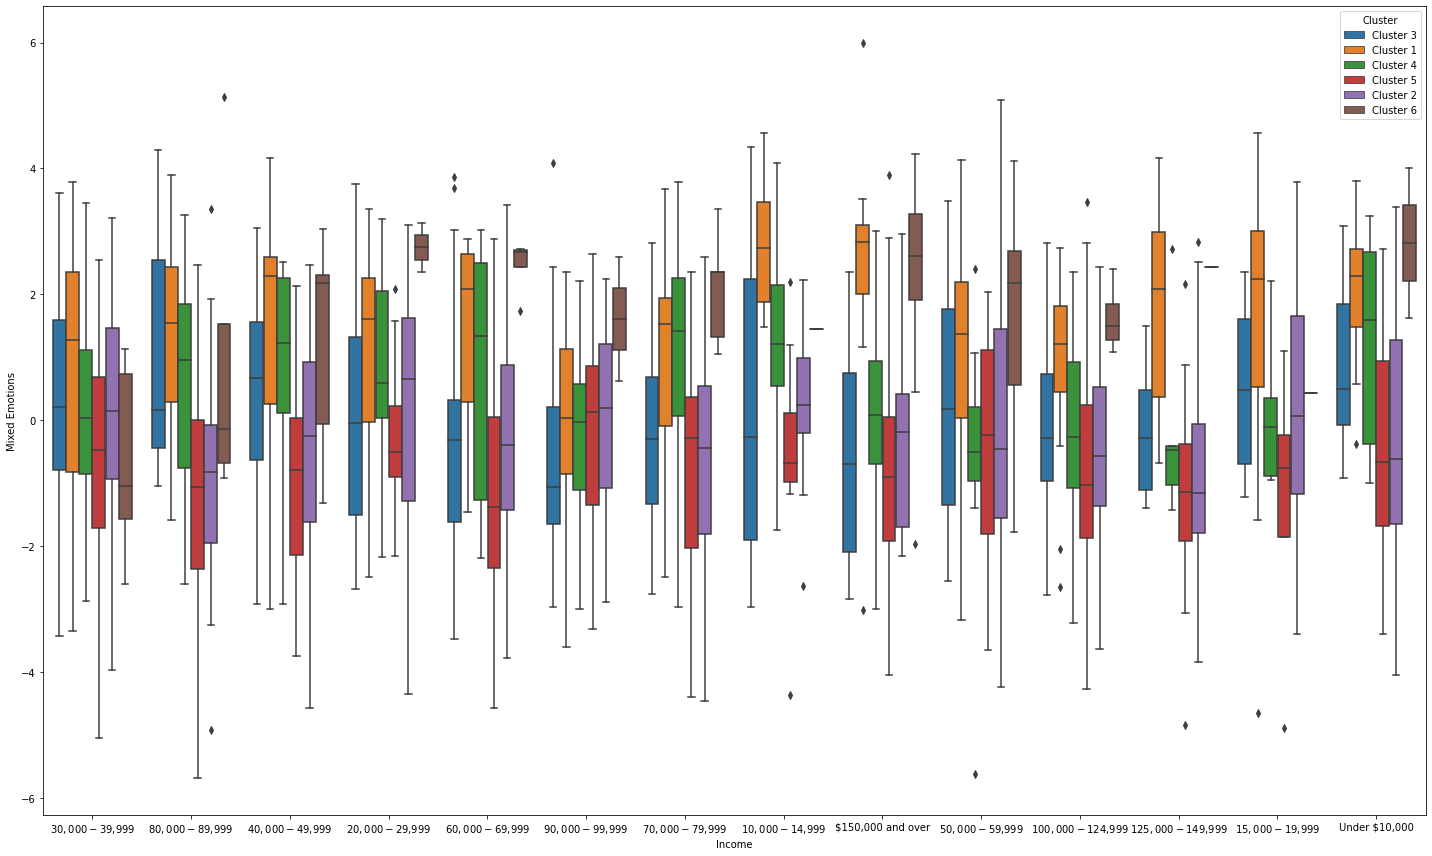

In [113]:
########################
# INCOME
########################

# Mixed Emotions - Behavior
fig, ax = plt.subplots(figsize = (20,12))
sns.boxplot(x = 'Income',
            y = 'Mixed Emotions',
            hue = 'Cluster',
            data = data_df1)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

<strong>Analysis of Race vs Teenage Years</strong><br>
- Cluster 3 stands out because it aligns with ‘Teenage Years’ behavioral personas. Most of these groups identify as White races.  

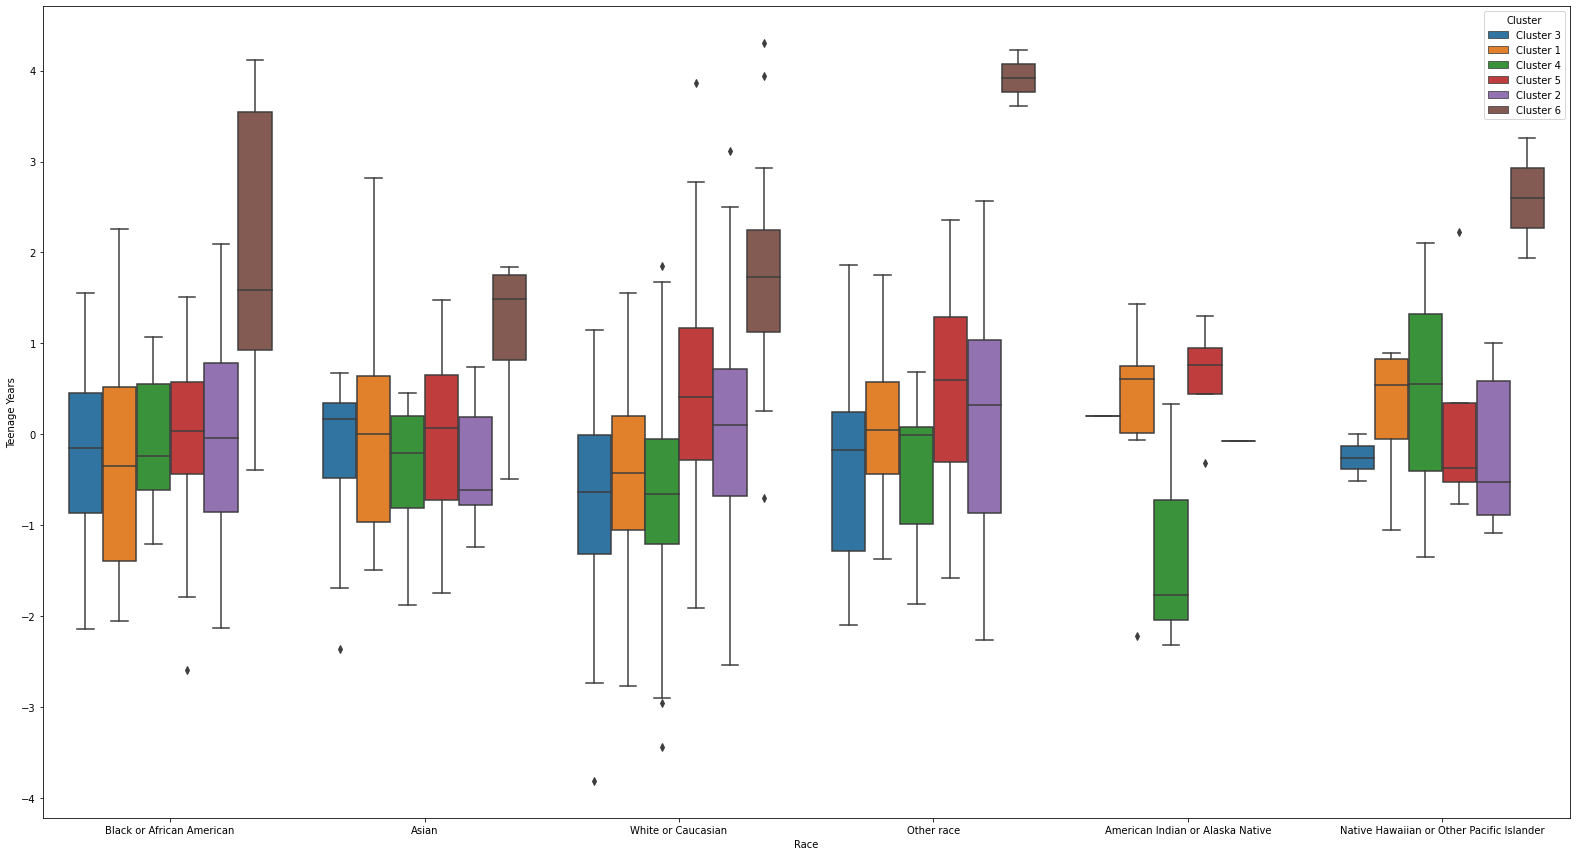

In [114]:
########################
# RACE
########################

# Teenage Years - Behavior
fig, ax = plt.subplots(figsize = (22,12))
sns.boxplot(x = 'Race',
            y = 'Teenage Years',
            hue = 'Cluster',
            data = data_df1)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

<strong>Analysis of Education vs Old World</strong><br>
- Many of these people identify with Cluster 3 meaning they have a mix of behavioral traits. Additionally, other people in this group who are not a part of cluster 3, are classified into cluster 5 who identify with ‘Old World’ and ‘Nostalgic’ behavioral traits.  

 

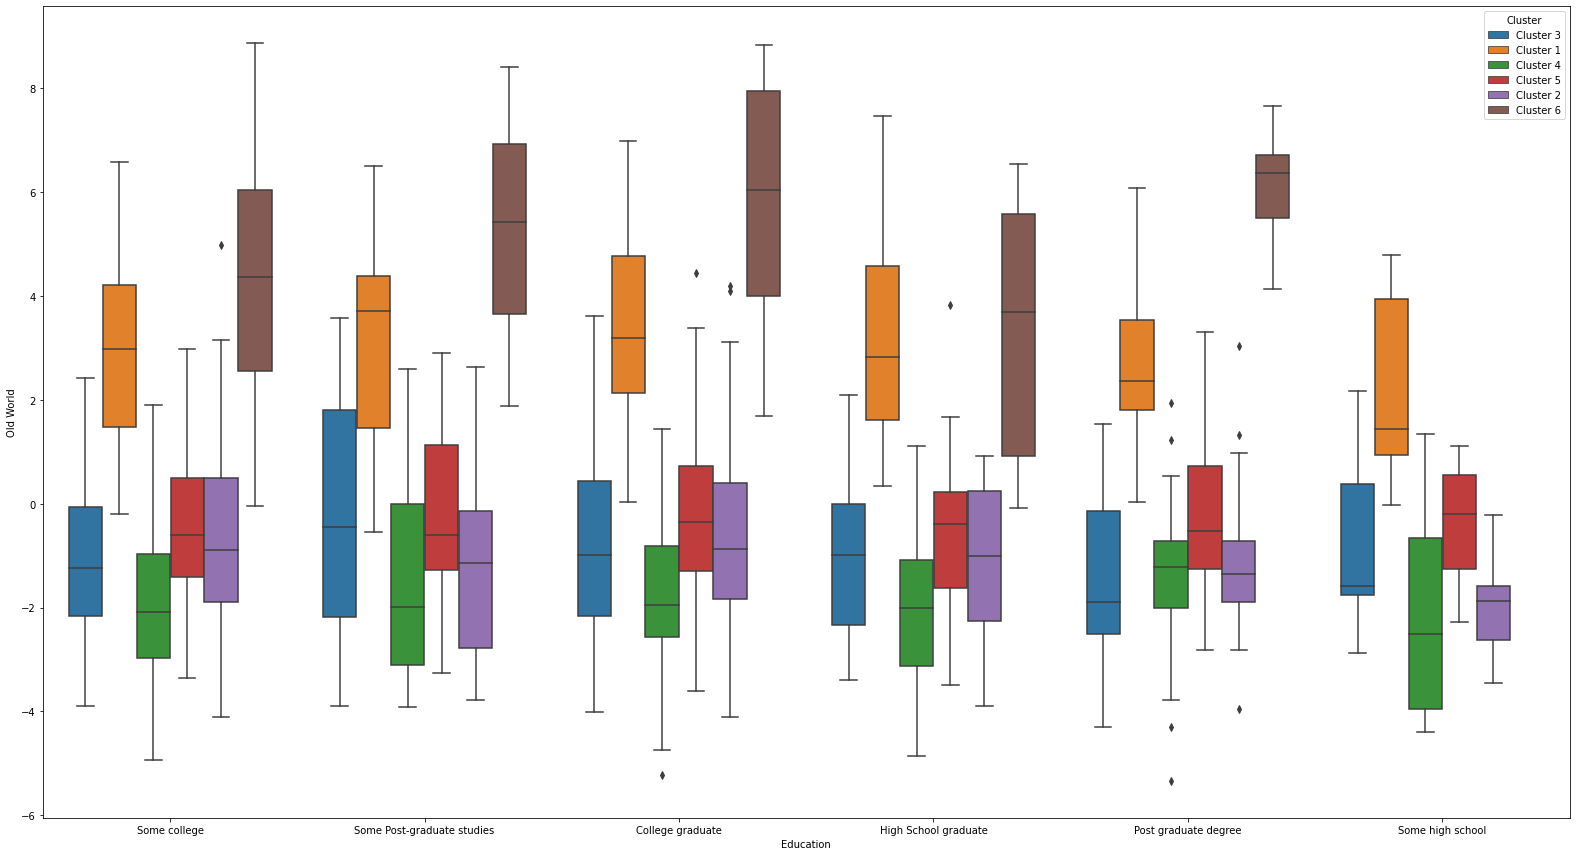

In [115]:
########################
# EDUCATION
########################

# Old World - Behavior
fig, ax = plt.subplots(figsize = (22,12))
sns.boxplot(x = 'Education',
            y = 'Old World',
            hue = 'Cluster',
            data = data_df1)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />